# <span style="color:darkblue"> Lecture 8b: Multiprocessing </span>

# <span style="color:darkblue"> I. Before we start </span>

<font size = "5">

Follow these instructions:

<font size = "3">

Install the following packages in Anaconda.<br>
Open your operating system terminal and type the following:

``` conda install conda-forge::multiprocess  ``` <br>

In Windows you can also uses the Anaconda Prompt

<font size = "5">

Import relevant packages

In [13]:
import multiprocess as mp
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## <span style="color:darkblue"> II. Basics of multi-processing </span>

<font size = "5">

Count number of CPUs

In [14]:
num_cpus = mp.cpu_count()

num_cpus

10

<font size = "5">

Define functions

In [15]:
fn_iseligible_vote = lambda age: age >= 18

<font size = "5">

Looping  + Functions


In [16]:
list_ages = [18,29,15,32,6]

for age in list_ages:
    print(str(fn_iseligible_vote(age)))


True
True
False
True
False


<font size = "5">

Map  + Functions


In [17]:
list_ages = [18,29,15,32,6]
output = list(map(fn_iseligible_vote,list_ages))
output

[True, True, False, True, False]

<font size = "5">

Parallel Map + Functions

- Use the "pool" command to distribute computation across <br>
differen processors in the computer


In [18]:
list_ages = [18,29,15,32,6]

with mp.Pool(num_cpus) as pool:
    output = pool.map(fn_iseligible_vote, list_ages)

output

[True, True, False, True, False]

## <span style="color:darkblue"> III. Other tricks </span>

<font size = "5">

Partialling out:
- Make functions only depend on one argument <br>
with the other fixed at a fixed value

In [19]:
import functools

fn_twoarguments = lambda x,y: x + y

fn_oneargument = functools.partial(fn_twoarguments, y=2)

# The other parameter is assiged at the previous predetermined value
fn_oneargument(x = 5)


7

<font size = "5">


Parallelizing functions with output of variable length


In [20]:
import multiprocess as mp

def bubble_sort(x):
    return np.array(x)*2

with mp.Pool(10) as pool:
    a = pool.map(bubble_sort, [[2,3,4],[1,9,4,5,2,6,8,4]])

print(a[0])
print(a[1])

[4 6 8]
[ 2 18  8 10  4 12 16  8]


<font size ="5">

Parallelizing functions with multiple output

In [25]:
import multiprocess as mp

def bubble_sort(x):
    return pd.DataFrame({"x_bar":np.sum(x), "xsd" : np.std(x)}, index = [0])

with mp.Pool(10) as pool:
    a = pool.map(bubble_sort, [[2,3,4],[1,9,4,5,2,6,8,4]])

results_table = pd.concat(a)

## <span style="color:darkblue"> IV. Application: Running Simulations </span>

<font size = "5"> 

Simulation via for loops

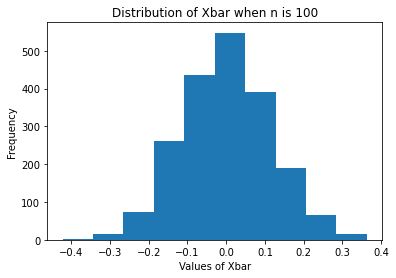

In [21]:
# To evaluate different sample size which just have to write a for-loop within 
# another for-loop

num_simulations = 2000
sample_size = 100

# The following command a vector null values, of length "num_simulations"
vec_xbar = [None] * num_simulations

for iteration in range(num_simulations):
        vec_unif  = np.random.uniform(low = -2, high=2, size = sample_size)
        vec_xbar[iteration] = vec_unif.mean()

plt.hist(vec_xbar)
plt.title("Distribution of Xbar when n is " + str(sample_size))
plt.ylabel("Frequency")
plt.xlabel("Values of Xbar")
plt.show()

    

<font size = "5">

Writing the main task as a function

In [22]:
# We define a function
# The iteration argument is not used in the body of the code
# and is only used to keep track of iterations for the parallel code later

def simulate_estimator(iteration):
    vec_unif  = np.random.uniform(low = -2, high=2, size = sample_size)
    xbar = vec_unif.mean()
    xsd  = vec_unif.std()
    return pd.DataFrame({"xbar":xbar, "xsd" : xsd}, index = [0])

# Rest that the function is running
simulate_estimator(0)

,xbar,xsd
0,-0.012868,1.172642


<font size = "5"> 

Simulation via multiprocessing

In [23]:
with mp.Pool(num_cpus) as pool:
    vec_xbar = pool.map(simulate_estimator, range(num_simulations))

results_table = pd.concat(vec_xbar)

<font size ="5">

Try it yourself! Test whether this is a 95% confidence interval

Code the following exercise from Lecture 7 in parallel.


<font size = "3">

Procedure:
- Create a variable called "num_simulations" with value 1000
- Create the simulation parameters "n", "population_mean", "populations_stdv".
- Create an empty vector called "list_test_confidenceinterval".
- Create a loop. At each iteration:

    - Create a vector of normal random variables of size "n".
    - Create a variable "test_confidenceinterval", which tests:
    
        lower_bound $\quad \le \quad $ population_mean $\quad \le \quad$ upper_bound
    - Append "test_confidenceinterval" to the above list
    
- Compute the mean of "list_test_confidenceinterval"

Note: The final result should be close to 95%.



In [23]:
# Write your own code



